<a href="https://colab.research.google.com/github/Faridahgatwiri/Faridahgatwiri/blob/main/WORLD_UNIVERSITY_RANKINGS_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Faridah Nyaga
#Student ID: 149482
#DSA 8203

# Introduction 
The data is called WORLD UNIVERSITY RANKINGS 2022-2023 by the Center of World University Rankings (CWUR). The center ranks Universities based on the following four factors; education (25%), employability (25%), faculty (10%), and research (40%). In the Year 2022-2023, Universities were ranked and those placed at the top made the CWUR global 2000 list
#Objectives
My concentration will be finding the representation of African universitites in the dataset. I will find out; the country with the most universities represented in the top 2000, the country with the most universities in the top 10 and Number of Universities per country in the list. I will then add locations in the data set to be able to divide the data into continents then regions of the continents. This will assist me in getting more analysis in Africa per the four rankings.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels
import numpy as np
import plotly.express as px

Dataset link in Kaggle = https://www.kaggle.com/datasets/4c5d5aecdebdec38eee4f9de4546e92868be0f4dc1b0351078b307acec179158

In [ ]:
df = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')
df

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,3,Stanford University,USA,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,-,-,-,1921,65.8
1996,1997,Federal University of Maranhão,Brazil,56,-,-,-,1923,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,-,797,-,1948,65.7
1998,1999,University of Tarapacá,Chile,16,-,-,-,1925,65.7


In [ ]:
df.shape

(2000, 9)

In [ ]:
df.head()

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,3,Stanford University,USA,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [ ]:
df.describe()

,World Rank,National Rank,Score
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,68.374000,71.586450
std,577.494589,84.132189,5.079795
min,1.000000,1.000000,65.700000
25%,500.750000,10.000000,67.700000
50%,1000.500000,33.000000,70.200000
75%,1500.250000,88.000000,74.100000
max,2000.000000,335.000000,100.000000


In [ ]:
df.isna()


,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

World Rank            False
Institution           False
Location              False
National Rank         False
Education Rank        False
Employability Rank    False
Faculty Rank          False
Research Rank         False
Score                 False
dtype: bool

we can see that there are no missing values

In [ ]:
df.dtypes

World Rank              int64
Institution            object
Location               object
National Rank           int64
Education Rank         object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

#DATA CLEANING

Changing data types of numeric columns from object to int64 or float

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns Education Rank, Employability Rank, Faculty Rank and Research Rank have a special character (-) which prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Therefore, we create a cleaning function to remove the special character.

In [ ]:
#cleaning function

# List of characters to remove
chars_to_remove = ['-']
# List of column names to clean
cols_to_clean = ['Education Rank','Employability Rank','Faculty Rank','Research Rank']

def clean_step(chars_to_remove, cols_to_clean):
  for col in cols_to_clean:
    for char in chars_to_remove:
      df[cols_to_clean] = df[cols_to_clean].replace("-",np.nan )
      return df
print (clean_step(chars_to_remove, cols_to_clean))

      World Rank                                        Institution  \
0              1                                 Harvard University   
1              2              Massachusetts Institute of Technology   
2              3                                Stanford University   
3              4                            University of Cambridge   
4              5                               University of Oxford   
...          ...                                                ...   
1995        1996                           Bharathidasan University   
1996        1997                     Federal University of Maranhão   
1997        1998        Jiangxi University of Finance and Economics   
1998        1999                             University of Tarapacá   
1999        2000  National Institute of Mental Health and Neuros...   

            Location  National Rank Education Rank Employability Rank  \
0                USA              1              1                  1   
1

In [ ]:
df

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,3,Stanford University,USA,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,NaN,NaN,NaN,1921,65.8
1996,1997,Federal University of Maranhão,Brazil,56,NaN,NaN,NaN,1923,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,NaN,797,NaN,1948,65.7
1998,1999,University of Tarapacá,Chile,16,NaN,NaN,NaN,1925,65.7


In [ ]:
# locating a sample row to confirm if the special character has been replaced
df.iloc[34]

World Rank                                                 35
Institution           University of California, San Francisco
Location                                                  USA
National Rank                                              23
Education Rank                                            NaN
Employability Rank                                       1498
Faculty Rank                                               14
Research Rank                                              26
Score                                                    86.0
Name: 34, dtype: object

In [ ]:
df.isna() #checking if null values have been added

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,True,True,True,False,False
1996,False,False,False,False,True,True,True,False,False
1997,False,False,False,False,True,False,True,False,False
1998,False,False,False,False,True,True,True,False,False


In [ ]:
#changing data types from objects for easier analysis
df['Education Rank']= df['Education Rank'].astype('float')
df['Employability Rank']= df['Employability Rank'].astype('float')
df['Faculty Rank']= df['Faculty Rank'].astype('float')
df['Research Rank']= df['Research Rank'].astype('float')

In [ ]:
#Checking if the datatypes have changed
df.dtypes

World Rank              int64
Institution            object
Location               object
National Rank           int64
Education Rank        float64
Employability Rank    float64
Faculty Rank          float64
Research Rank         float64
Score                 float64
dtype: object

# DATA EXPLORATORY


In [ ]:
df.describe()

,World Rank,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
count,2000.000000,2000.000000,430.000000,999.000000,269.000000,1937.000000,2000.000000
mean,1000.500000,68.374000,266.986047,755.841842,136.490706,969.149716,71.586450
std,577.494589,84.132189,162.135975,493.100295,79.645793,559.571026,5.079795
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.700000
25%,500.750000,10.000000,117.250000,311.500000,68.000000,485.000000,67.700000
50%,1000.500000,33.000000,276.500000,738.000000,135.000000,969.000000,70.200000
75%,1500.250000,88.000000,412.750000,1171.500000,205.000000,1453.000000,74.100000
max,2000.000000,335.000000,536.000000,1653.000000,274.000000,1995.000000,100.000000


The output above shows that

In [ ]:
#now that the data types have been corrected, statistical analysis to the dataset is possible
#we begin by checking how many countries made the global top 2000 list
countries = df['Location'].unique()
print(countries)
print (len(countries)) 

['USA' 'United Kingdom' 'Japan' 'France' 'Canada' 'Switzerland'
 'South Korea' 'Denmark' 'Sweden' 'Germany' 'China' 'Australia' 'Israel'
 'Netherlands' 'Norway' 'Singapore' 'Taiwan' 'Brazil' 'Italy' 'Belgium'
 'Finland' 'Spain' 'Portugal' 'Russia' 'Austria' 'Czech Republic'
 'Ireland' 'Saudi Arabia' 'South Africa' 'New Zealand' 'Greece' 'Mexico'
 'Serbia' 'Iran' 'Argentina' 'Poland' 'Chile' 'Malaysia' 'Slovenia'
 'India' 'Thailand' 'Hungary' 'Estonia' 'Croatia' 'Egypt' 'Iceland'
 'Turkey' 'Slovak Republic' 'Lithuania' 'Lebanon' 'Pakistan' 'Cyprus'
 'Colombia' 'Armenia' 'Belarus' 'Luxembourg' 'Georgia' 'Romania'
 'Bulgaria' 'United Arab Emirates' 'Qatar' 'Uruguay' 'Morocco' 'Uganda'
 'Tunisia' 'Ethiopia' 'Ukraine' 'Vietnam' 'Nigeria' 'Ghana' 'Philippines'
 'Oman' 'Jordan' 'Kuwait' 'Costa Rica' 'Azerbaijan' 'Cameroon' 'Malawi'
 'Kenya' 'Peru' 'Latvia' 'Indonesia' 'Zambia' 'Sri Lanka'
 'Northern Cyprus' 'Ecuador' 'Malta' 'Zimbabwe' 'Kazakhstan' 'Bangladesh'
 'Nepal' 'Venezuela' 'Algeria' 

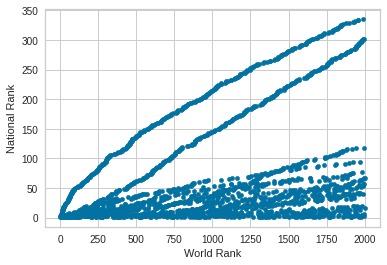

In [ ]:
df.plot.scatter(x='World Rank', y = 'National Rank')

From the above scatter plot, it is evident that most of the universities in the top 2000 world list are in the top 100 in their nations. It also shows that there are 2 nations with more than 300 univerties in the list.

In [ ]:
#checking out number of institutions per country ranked as the scatter plot above shows that there are countries
#with more than 150 institutions ranked
px.histogram(df['Location'],nbins = 96)

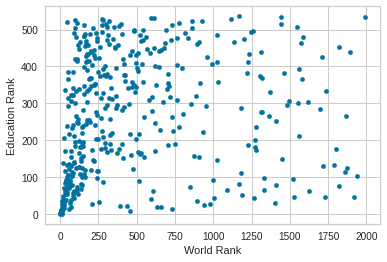

In [ ]:
df.plot.scatter(x='World Rank', y = 'Education Rank')

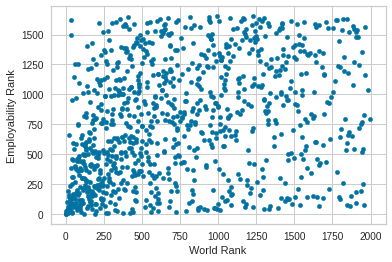

In [ ]:
df.plot.scatter(x='World Rank', y = 'Employability Rank')

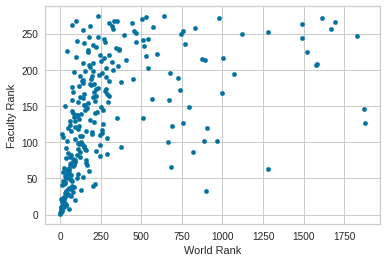

In [ ]:
df.plot.scatter(x='World Rank', y = 'Faculty Rank')

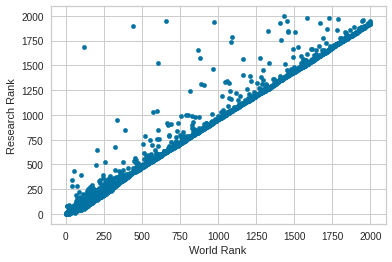

In [ ]:
df.plot.scatter(x='World Rank', y = 'Research Rank')

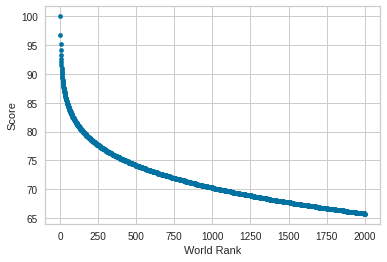

In [ ]:
df.plot.scatter(x='World Rank', y = 'Score')

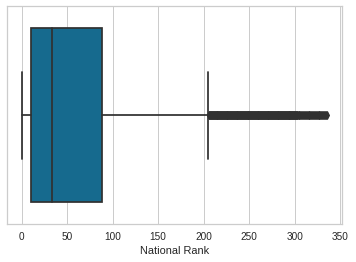

In [ ]:
sns.boxplot(data = df,x='National Rank')

the boxplot shows a positive skew

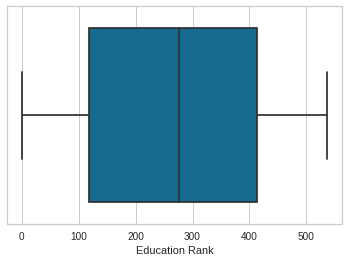

In [ ]:
sns.boxplot(data = df,x='Education Rank')

the boxplot above shows a normal skew

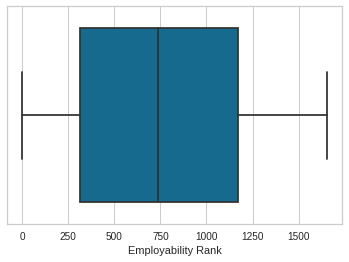

In [ ]:
sns.boxplot(data = df,x='Employability Rank')

the boxplot above shows a normal skew

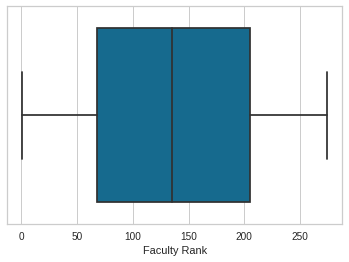

In [ ]:
sns.boxplot(data = df,x='Faculty Rank')

the boxplot above shows a normal skew

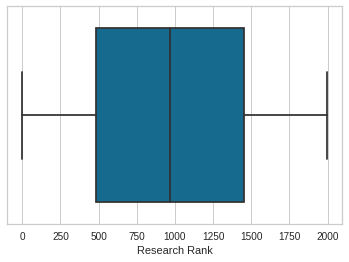

In [ ]:
sns.boxplot(data = df,x='Research Rank')

the boxplot above shows a normal skew

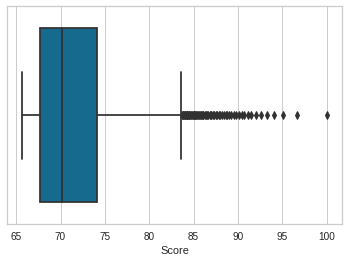

In [ ]:
sns.boxplot(data = df,x='Score')

the boxplot above shows a positive skew

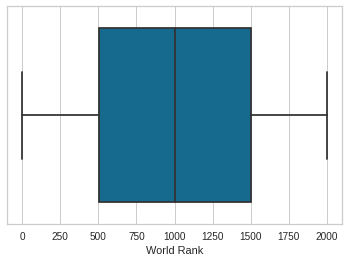

In [ ]:
sns.boxplot(data = df,x='World Rank')

the boxplot above shows a normal skew

In [ ]:
#Location_rank = df.groupby(['Location', 'Institution', 'World Rank', 'National Rank'])
#display(Location_rank)

In [ ]:
df.sort_values(by='National Rank').head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
1505,1506,Cayetano Heredia Peruvian University,Peru,1,NaN,NaN,NaN,1437.0,67.7
233,234,Charles University in Prague,Czech Republic,1,328.0,1326.0,NaN,175.0,77.9
234,235,Trinity College Dublin,Ireland,1,205.0,85.0,245.0,293.0,77.9
1404,1405,University of Nairobi,Kenya,1,NaN,1553.0,NaN,1348.0,68.1
1395,1396,University of Malawi,Malawi,1,NaN,NaN,NaN,1337.0,68.2
260,261,King Abdulaziz University,Saudi Arabia,1,NaN,1283.0,NaN,205.0,77.4
1368,1369,University of Yaoundé I,Cameroon,1,NaN,NaN,NaN,1306.0,68.3
269,270,University of Cape Town,South Africa,1,178.0,237.0,NaN,250.0,77.2
271,272,University of Auckland,New Zealand,1,511.0,459.0,NaN,227.0,77.2


The visualization above shows that there are countries with more than 200 institutions which made it to the top 2000 world rankings list which is an interesting find. Let us find out the countries below

In [ ]:
df.sort_values(by='Education Rank').head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
9,10,California Institute of Technology,USA,8,2.0,104.0,7.0,80.0,90.7
3,4,University of Cambridge,United Kingdom,1,3.0,25.0,4.0,10.0,94.1
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,7.0,96.7
5,6,Princeton University,USA,4,5.0,15.0,6.0,79.0,92.6
10,11,Yale University,USA,9,6.0,36.0,12.0,20.0,90.4
4,5,University of Oxford,United Kingdom,2,7.0,27.0,9.0,4.0,93.3
6,7,University of Chicago,USA,5,8.0,16.0,21.0,22.0,92.0
11,12,"University of California, Berkeley",USA,10,9.0,59.0,5.0,16.0,90.1
457,458,Antioch College,USA,126,10.0,NaN,NaN,NaN,74.6


In [ ]:
df.sort_values(by='Employability Rank').head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
118,119,INSEAD,France,6,NaN,2.0,NaN,1683.0,81.0
190,191,Institut national du service public,France,11,NaN,3.0,NaN,NaN,78.9
2,3,Stanford University,USA,3,11.0,4.0,3.0,2.0,95.1
278,279,China Europe International Business School,China,31,NaN,5.0,NaN,NaN,77.1
12,13,University of Tokyo,Japan,1,37.0,6.0,112.0,29.0,89.8
265,266,HEC Paris,France,15,NaN,7.0,NaN,NaN,77.3
8,9,University of Pennsylvania,USA,7,14.0,8.0,41.0,11.0,91.1
42,43,Institut Polytechnique de Paris,France,5,100.0,9.0,226.0,344.0,85.2
377,378,International Institute for Management Develop...,Switzerland,8,NaN,10.0,NaN,NaN,75.6


In [ ]:
df.sort_values(by='Faculty Rank').head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,7.0,96.7
2,3,Stanford University,USA,3,11.0,4.0,3.0,2.0,95.1
3,4,University of Cambridge,United Kingdom,1,3.0,25.0,4.0,10.0,94.1
11,12,"University of California, Berkeley",USA,10,9.0,59.0,5.0,16.0,90.1
5,6,Princeton University,USA,4,5.0,15.0,6.0,79.0,92.6
9,10,California Institute of Technology,USA,8,2.0,104.0,7.0,80.0,90.7
54,55,Rockefeller University,USA,32,15.0,NaN,8.0,436.0,84.2
4,5,University of Oxford,United Kingdom,2,7.0,27.0,9.0,4.0,93.3
7,8,Columbia University,USA,6,12.0,14.0,10.0,14.0,91.5


In [ ]:
df.sort_values(by='Research Rank').head(20)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,1.0,1.0,1.0,100.0
2,3,Stanford University,USA,3,11.0,4.0,3.0,2.0,95.1
23,24,University of Toronto,Canada,1,207.0,159.0,22.0,3.0,87.5
4,5,University of Oxford,United Kingdom,2,7.0,27.0,9.0,4.0,93.3
20,21,University College London,United Kingdom,3,33.0,660.0,15.0,5.0,88.0
14,15,"University of Michigan, Ann Arbor",USA,12,29.0,40.0,59.0,6.0,89.2
1,2,Massachusetts Institute of Technology,USA,2,4.0,12.0,2.0,7.0,96.7
15,16,Johns Hopkins University,USA,13,24.0,192.0,23.0,8.0,89.0
24,25,University of Washington,USA,19,71.0,231.0,25.0,9.0,87.3
3,4,University of Cambridge,United Kingdom,1,3.0,25.0,4.0,10.0,94.1


In [ ]:
#clusters**

#correlation

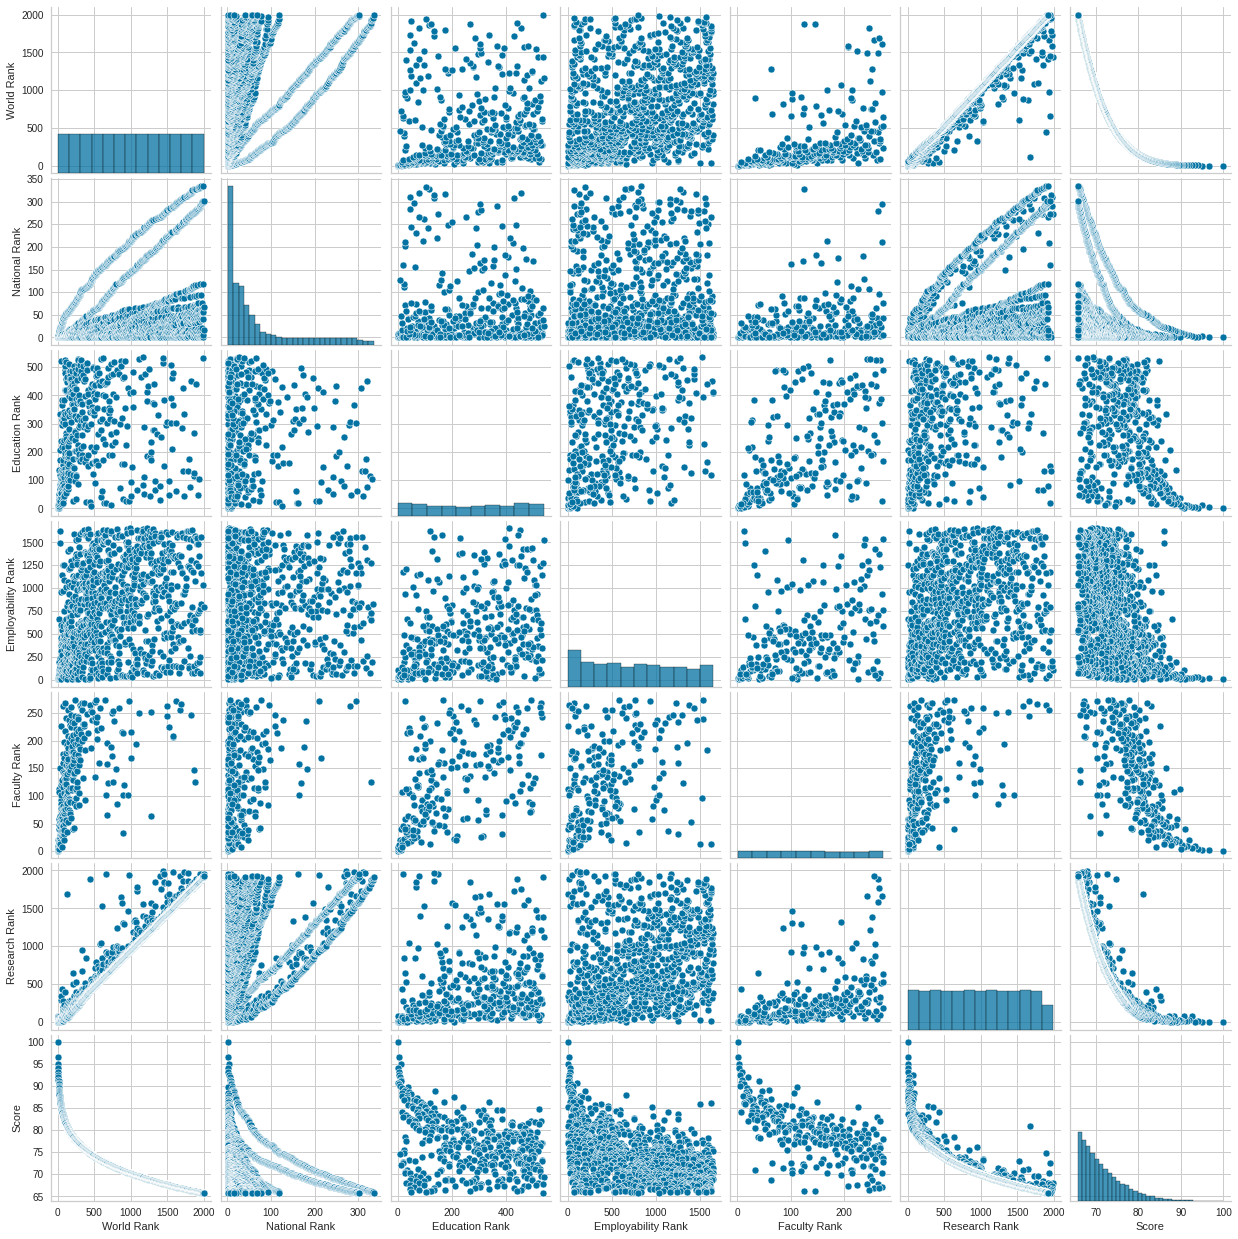

In [ ]:
sns.pairplot(df)

In [ ]:
#compare all variables with one another to identify how variables correlate with one another
df.corr()

,World Rank,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,1.000000,0.348346,0.158563,0.331617,0.470218,0.984443,-0.916950
National Rank,0.348346,1.000000,-0.053470,0.040673,0.231886,0.355234,-0.332822
Education Rank,0.158563,-0.053470,1.000000,0.312050,0.520356,0.222363,-0.366063
Employability Rank,0.331617,0.040673,0.312050,1.000000,0.349892,0.324157,-0.411214
Faculty Rank,0.470218,0.231886,0.520356,0.349892,1.000000,0.459946,-0.678366
Research Rank,0.984443,0.355234,0.222363,0.324157,0.459946,1.000000,-0.903338
Score,-0.916950,-0.332822,-0.366063,-0.411214,-0.678366,-0.903338,1.000000


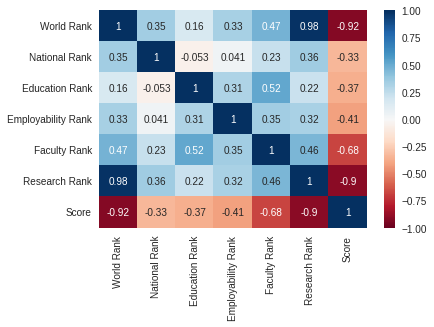

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
df.corr().style.background_gradient(cmap ='RdBu', vmin=-1, vmax=1)

,World Rank,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
World Rank,1.000000,0.348346,0.158563,0.331617,0.470218,0.984443,-0.916950
National Rank,0.348346,1.000000,-0.053470,0.040673,0.231886,0.355234,-0.332822
Education Rank,0.158563,-0.053470,1.000000,0.312050,0.520356,0.222363,-0.366063
Employability Rank,0.331617,0.040673,0.312050,1.000000,0.349892,0.324157,-0.411214
Faculty Rank,0.470218,0.231886,0.520356,0.349892,1.000000,0.459946,-0.678366
Research Rank,0.984443,0.355234,0.222363,0.324157,0.459946,1.000000,-0.903338
Score,-0.916950,-0.332822,-0.366063,-0.411214,-0.678366,-0.903338,1.000000


In [ ]:
#def tweak_kag(df):

In [ ]:
"""X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std"""

'X = df\nstd = preprocessing.StandardScaler()\nX_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)\nX_std'

# ADDING REGIONS
Adding continents and regions to the data to be able to see ranking of universities per region.
To be able to determine African universities featuring in the datasets and how many universities per Africa regions that made it in the top 2000 Universities list. This will inform individuals looking to further their studies in specific regions in Africa the best universities to study per the various ranks.

In [ ]:
#installation
!pip install pycountry-convert



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent():
    try:
        cn_a2_code =  country_name_to_country_alpha2()
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)
print(get_continent())"""

"#function to convert to alpah2 country codes and continents\nfrom pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2\ndef get_continent():\n    try:\n        cn_a2_code =  country_name_to_country_alpha2()\n    except:\n        cn_a2_code = 'Unknown' \n    try:\n        cn_continent = country_alpha2_to_continent_code(cn_a2_code)\n    except:\n        cn_continent = 'Unknown' \n    return (cn_a2_code, cn_continent)\nprint(get_continent())"

In [ ]:
!pip install geopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
Location = df['Location']
def geolocate(Location):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(Location)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
print(geolocate(Location))"""

"#function to get longitude and latitude data from country name\nfrom geopy.geocoders import Nominatim\ngeolocator = Nominatim()\nLocation = df['Location']\ndef geolocate(Location):\n    try:\n        # Geolocate the center of the country\n        loc = geolocator.geocode(Location)\n        # And return latitude and longitude\n        return (loc.latitude, loc.longitude)\n    except:\n        # Return missing value\n        return np.nan\nprint(geolocate(Location))"

In [ ]:
#installation
!pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencage


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
key = ('70c4d7d1b18d4d0d84347a9826b3d46e')
from opencage.geocoder import OpenCageGeocode
geocoder = OpenCageGeocode(key)

In [ ]:
"""list_lat = []
list_long = []

for index, row in df.iterrows():
  Location = df['Location']
  query = str(Location)

  results = geocoder.geocode(query)
  lat = results[0]['geometry']['lat']
  long = results[0]['geometry']['lng']

  list_lat.append(lat)
  list_long.append(long)

df['lat']=list_lat
df['long'] = list_long"""

"list_lat = []\nlist_long = []\n\nfor index, row in df.iterrows():\n  Location = df['Location']\n  query = str(Location)\n\n  results = geocoder.geocode(query)\n  lat = results[0]['geometry']['lat']\n  long = results[0]['geometry']['lng']\n\n  list_lat.append(lat)\n  list_long.append(long)\n\ndf['lat']=list_lat\ndf['long'] = list_long"

In [ ]:
"""from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
Latitude = []
Longitude = []

def findGeocode(Location):
  try:
    geolocator = Nominatim (user_agent= 'GetLoc')
    return geolocator.geocode(Location)
  except GeocoderTimedOut:
    return findGeocode(Location)

for i in (df['Location']):
  if findGeocode(i) != None:
    loc = findGeocode(i)
    Latitude.append(loc.Latitude)
    Longitude.append(loc.Longitude)
  else:
    Latitude.append(np.nan)
    Longitude.append(np.nan)

df['Longitude'] = Longitude
df['Latitude'] = Latitude

df"""


"from geopy.exc import GeocoderTimedOut\nfrom geopy.geocoders import Nominatim\nLatitude = []\nLongitude = []\n\ndef findGeocode(Location):\n  try:\n    geolocator = Nominatim (user_agent= 'GetLoc')\n    return geolocator.geocode(Location)\n  except GeocoderTimedOut:\n    return findGeocode(Location)\n\nfor i in (df['Location']):\n  if findGeocode(i) != None:\n    loc = findGeocode(i)\n    Latitude.append(loc.Latitude)\n    Longitude.append(loc.Longitude)\n  else:\n    Latitude.append(np.nan)\n    Longitude.append(np.nan)\n\ndf['Longitude'] = Longitude\ndf['Latitude'] = Latitude\n\ndf"

In [ ]:
"""Latitude = []
Longitude = []
Location = df['Location']
# importing geopy library
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

for index, row in df.iterrows():
  Location = df['Location']
  query = str(Location)
  getLoc = loc.geocode('Location')
  Latitude.append(getLoc.latitude)
  Longitude.append(getLoc.longitude)


# printing latitude and longitude
df['Longitude'] = Longitude
df['Latitude'] = Latitude 
df"""

'Latitude = []\nLongitude = []\nLocation = df[\'Location\']\n# importing geopy library\nfrom geopy.geocoders import Nominatim\n \n# calling the Nominatim tool\nloc = Nominatim(user_agent="GetLoc")\n\nfor index, row in df.iterrows():\n  Location = df[\'Location\']\n  query = str(Location)\n  getLoc = loc.geocode(\'Location\')\n  Latitude.append(getLoc.latitude)\n  Longitude.append(getLoc.longitude)\n\n\n# printing latitude and longitude\ndf[\'Longitude\'] = Longitude\ndf[\'Latitude\'] = Latitude \ndf'

In [ ]:
"""Latitude = []
Longitude = []
from geopy.geocoders import Nominatim
geolocator = Nominatim()

#for i in len(df['Location']):
# Geolocate the center of the country
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode(df['Location'])
# And return latitude and longitude

Latitude.append(getLoc.latitude)
Longitude.append(getLoc.longitude)


df['Latitude']= Latitude
df['Longitude'] = Longitude
df"""

'Latitude = []\nLongitude = []\nfrom geopy.geocoders import Nominatim\ngeolocator = Nominatim()\n\n#for i in len(df[\'Location\']):\n# Geolocate the center of the country\nloc = Nominatim(user_agent="GetLoc")\ngetLoc = loc.geocode(df[\'Location\'])\n# And return latitude and longitude\n\nLatitude.append(getLoc.latitude)\nLongitude.append(getLoc.longitude)\n\n\ndf[\'Latitude\']= Latitude\ndf[\'Longitude\'] = Longitude\ndf'